In [60]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

clubs_df = pd.read_feather('../cleaned_data/clubs.feather')
games_df = pd.read_feather('../cleaned_data/games.feather')
club_games_df = pd.read_feather('../cleaned_data/club_games.feather')
players_df = pd.read_feather('../cleaned_data/players.feather')

# Teams Stats
Visualizzazioni riguardanti le statistiche delle squadre, sia club che nazionali

### Statistiche Nazionali

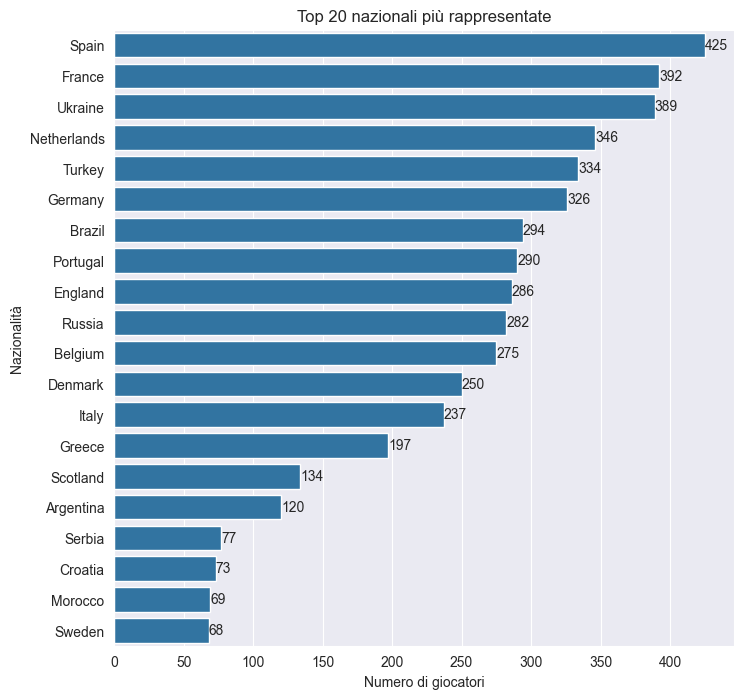

In [61]:
# nazionali con più giocatori

nat_count = players_df['nationality'].value_counts().head(20)

plt.figure(figsize=(8, 8))
ax = sns.barplot(x=nat_count.values, y=nat_count.index)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', ((p.get_width()), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Top 20 nazionali più rappresentate')
plt.xlabel('Numero di giocatori')
plt.ylabel('Nazionalità')
plt.show()

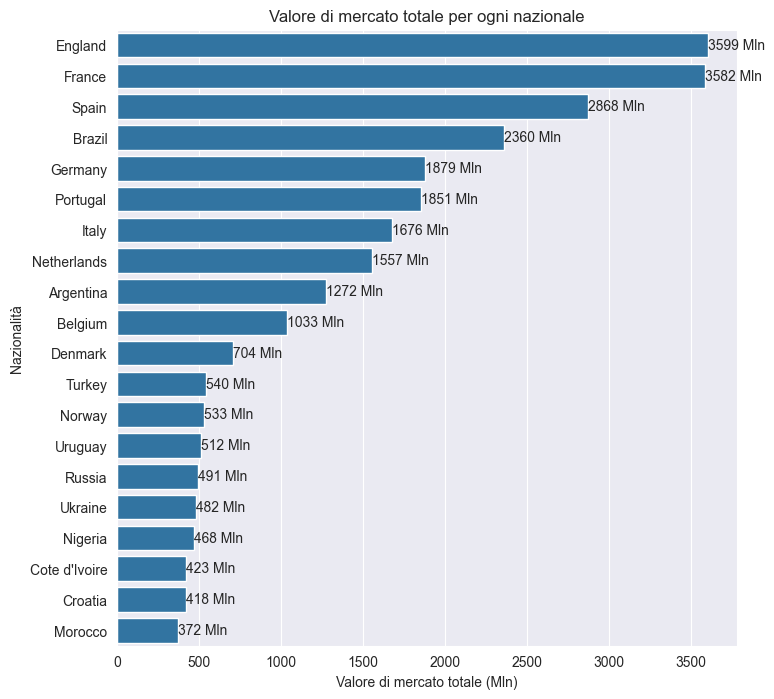

In [62]:
# VDM totale per nazionalità

market_value_by_nationality = players_df.groupby('nationality')['market_value_mln'].sum().reset_index()
market_value_by_nationality = market_value_by_nationality.sort_values(by='market_value_mln', ascending=False).head(20)

plt.figure(figsize=(8, 8))
ax = sns.barplot(data=market_value_by_nationality, y='nationality', x='market_value_mln')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f} Mln', ((p.get_width()), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Valore di mercato totale per ogni nazionale')
plt.xlabel('Valore di mercato totale (Mln)')
plt.ylabel('Nazionalità')
plt.show()

### Statistiche Club

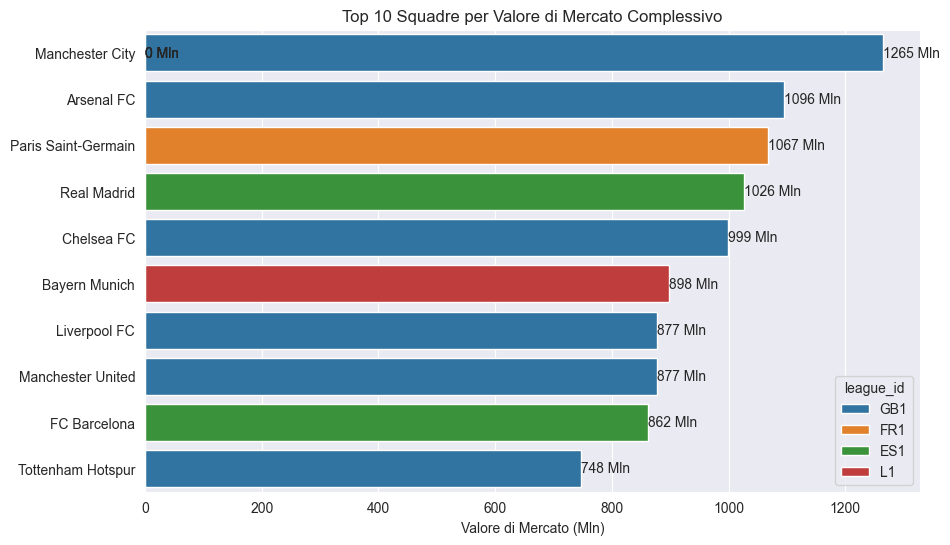

In [63]:
# top 10 teams by market value

top_10_teams = clubs_df.nlargest(10, 'total_market_value_mln')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_teams, x='total_market_value_mln', y='club_name', hue='league_id')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f} Mln', ((p.get_width()), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Top 10 Squadre per Valore di Mercato Complessivo')
plt.xlabel('Valore di Mercato (Mln)')
plt.ylabel('')
plt.show()

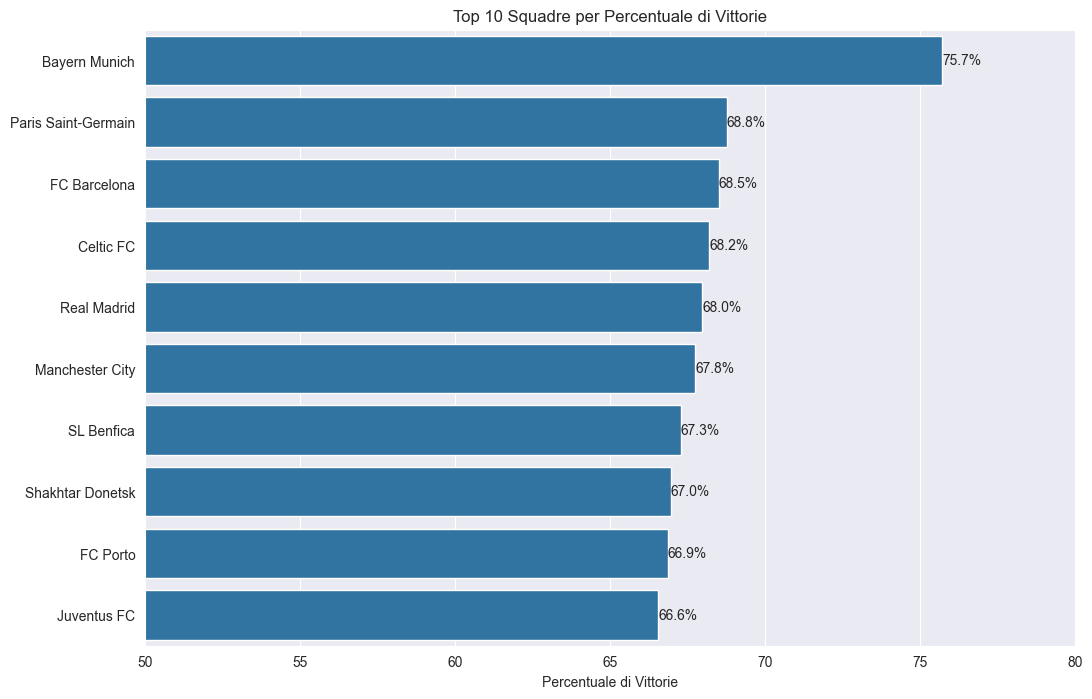

In [64]:
# top 10 squadre per percentuale di vittorie

total_games = club_games_df['club_id'].value_counts().reset_index()
total_games.columns = ['club_id', 'total_games']

club_wins = club_games_df[club_games_df['is_win'] == True]['club_id'].value_counts().reset_index()
club_wins.columns = ['club_id', 'wins']


club_stats = pd.merge(total_games, club_wins, on='club_id', how='left').fillna(0)
club_stats['win_percentage'] = (club_stats['wins'] / club_stats['total_games']) * 100

club_stats = club_stats.merge(clubs_df[['club_id', 'club_name']], on='club_id')

top10_clubs = club_stats.sort_values(by='win_percentage', ascending=False).head(10)


plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top10_clubs, y='club_name', x='win_percentage')

for i, (value, name) in enumerate(zip(top10_clubs['win_percentage'], top10_clubs['club_name'])):
    ax.text(value, i, f"{value:.1f}%", ha="left", va='center', fontsize=10)

plt.title('Top 10 Squadre per Percentuale di Vittorie')
plt.xlabel('Percentuale di Vittorie')
plt.ylabel('')
plt.xlim(50, 80)
plt.show()

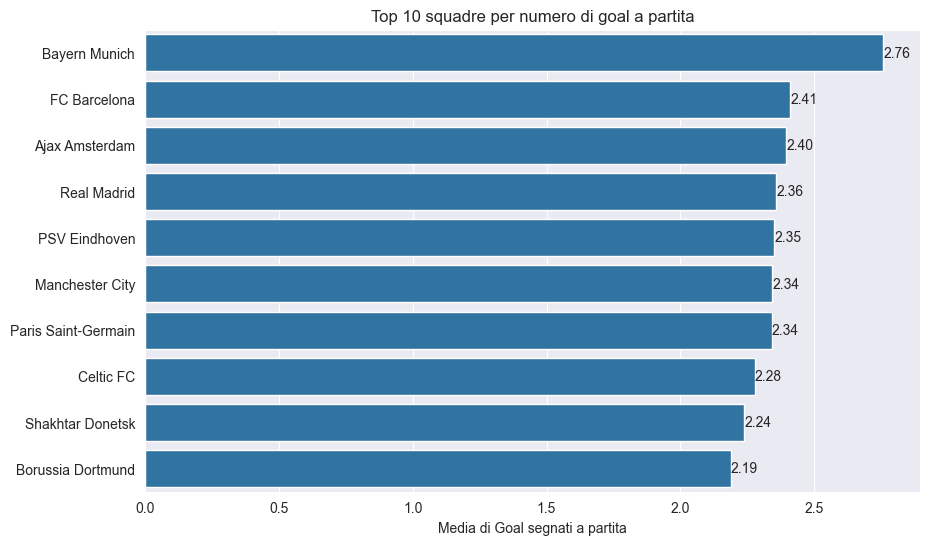

In [65]:
# top 10 squadre per numero di goal segnati
total_games = club_games_df['club_id'].value_counts().reset_index()
total_games.columns = ['club_id', 'total_games']

goals_by_club = club_games_df.groupby('club_id')['club_goals'].sum().reset_index()

club_stats = pd.merge(total_games, goals_by_club, on='club_id')

club_stats['goals_per_game'] = club_stats['club_goals'] / club_stats['total_games']

club_stats = club_stats.merge(clubs_df[['club_id', 'club_name']], on='club_id')

top10_clubs = club_stats.sort_values(by='goals_per_game', ascending=False).head(10)


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_clubs, x='goals_per_game', y='club_name')

for i, (value, name) in enumerate(zip(top10_clubs['goals_per_game'], top10_clubs['club_name'])):
    ax.text(value, i, f"{value:.2f}", ha="left", va='center', fontsize=10)

plt.title('Top 10 squadre per numero di goal a partita')
plt.xlabel('Media di Goal segnati a partita')
plt.ylabel('')
plt.show()

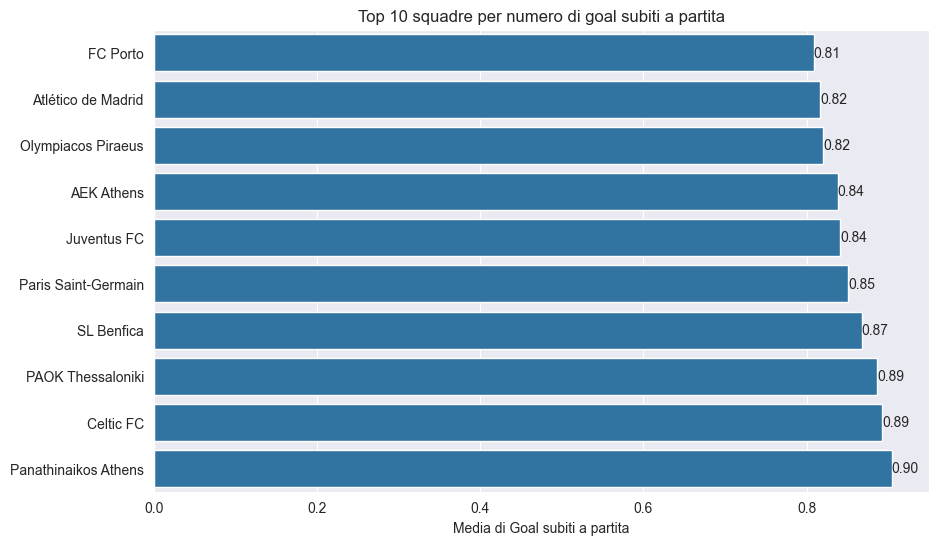

In [66]:
# top 10 squadre con meno goal subiti a partita

# top 10 squadre per numero di goal segnati
total_games = club_games_df['club_id'].value_counts().reset_index()
total_games.columns = ['club_id', 'total_games']

goals_conceded_by_club = club_games_df.groupby('club_id')['opponent_goals'].sum().reset_index()

club_stats = pd.merge(total_games, goals_conceded_by_club, on='club_id')

club_stats['goals_conceded_per_game'] = club_stats['opponent_goals'] / club_stats['total_games']

club_stats = club_stats.merge(clubs_df[['club_id', 'club_name']], on='club_id')

top10_clubs = club_stats.sort_values(by='goals_conceded_per_game', ascending=True).head(10)


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_clubs, x='goals_conceded_per_game', y='club_name')

for i, (value, name) in enumerate(zip(top10_clubs['goals_conceded_per_game'], top10_clubs['club_name'])):
    ax.text(value, i, f"{value:.2f}", ha="left", va='center', fontsize=10)

plt.title('Top 10 squadre per numero di goal subiti a partita')
plt.xlabel('Media di Goal subiti a partita')
plt.ylabel('')
plt.show()

In [67]:
clubs_df.query('club_name == "Bayern Munich"')

,club_id,club_code,full_club_name,league_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,url,market_value_in_eur,total_market_value_mln,coach_name,club_name
366,27,fc-bayern-munchen,FC Bayern München,L1,25,26.8,13,52.0,17,Allianz Arena,75024,+€23.25m,2023,https://www.transfermarkt.co.uk/fc-bayern-munc...,897700000.0,897.7,Thomas Tuchel,Bayern Munich


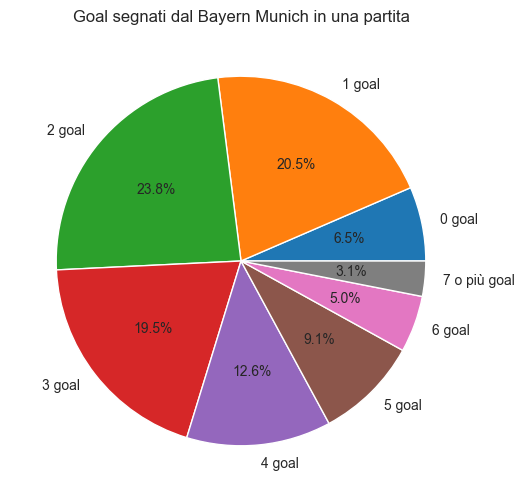

In [68]:
# distribuzione dei goal segnati da una singola squadra

bayern_games = club_games_df.query('club_id == 27')

goal_0 = bayern_games['club_goals'].value_counts()[0]
goal_1 = bayern_games['club_goals'].value_counts()[1]
goal_2 = bayern_games['club_goals'].value_counts()[2]
goal_3 = bayern_games['club_goals'].value_counts()[3]
goal_4 = bayern_games['club_goals'].value_counts()[4]
goal_5 = bayern_games['club_goals'].value_counts()[5]
goal_6 = bayern_games['club_goals'].value_counts()[6]
more_7 = len(bayern_games.query('club_goals >= 7'))

labels = ['0 goal', '1 goal', '2 goal', '3 goal', '4 goal', '5 goal', '6 goal', '7 o più goal']
prc = [goal_0, goal_1, goal_2, goal_3, goal_4, goal_5, goal_6, more_7]

plt.figure(figsize=(6,6))
plt.pie(prc,labels = labels, autopct= '%1.1f%%')
plt.title('Goal segnati dal Bayern Munich in una partita')
plt.show()